In [5]:
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

In [6]:
train_data_gen = ImageDataGenerator(rescale=1./255)
validation_data_gen = ImageDataGenerator(rescale=1./255)


In [7]:
train_generator = train_data_gen.flow_from_directory(
        r"C:\Users\Asus\OneDrive\Desktop\Emotion_detection_with_CNN-main\data\train",
        target_size=(48, 48),
        batch_size=128,
        color_mode="grayscale",
        class_mode='categorical')

# Preprocess all train images
validation_generator = validation_data_gen.flow_from_directory(
        r"C:\Users\Asus\OneDrive\Desktop\Emotion_detection_with_CNN-main\data\test",
        target_size=(48, 48),
        batch_size=128,
        color_mode="grayscale",
        class_mode='categorical')


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [8]:
emotion_model = Sequential()

emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))


In [9]:
emotion_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001, decay=1e-6), metrics=['accuracy'])
emotion_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 128)      0         
 2D)                                                    

In [10]:
emotion_model_info = emotion_model.fit_generator(
        train_generator,
        steps_per_epoch=28709 // 128,
        epochs=100,
        validation_data=validation_generator, 
        validation_steps=7178 // 128)

C:\Users\Asus\AppData\Local\Temp\ipykernel_7448\172871771.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  emotion_model_info = emotion_model.fit_generator(


Epoch 1/100
224/224 [==============================] - 222s 984ms/step - loss: 1.7599 - accuracy: 0.2798 - val_loss: 1.5845 - val_accuracy: 0.3951
Epoch 2/100
224/224 [==============================] - 289s 1s/step - loss: 1.4777 - accuracy: 0.4249 - val_loss: 1.3263 - val_accuracy: 0.4922
Epoch 3/100
224/224 [==============================] - 295s 1s/step - loss: 1.3060 - accuracy: 0.4966 - val_loss: 1.2389 - val_accuracy: 0.5246
Epoch 4/100
224/224 [==============================] - 324s 1s/step - loss: 1.2156 - accuracy: 0.5356 - val_loss: 1.1692 - val_accuracy: 0.5495
Epoch 5/100
224/224 [==============================] - 213s 949ms/step - loss: 1.1588 - accuracy: 0.5615 - val_loss: 1.1344 - val_accuracy: 0.5654
Epoch 6/100
224/224 [==============================] - 203s 905ms/step - loss: 1.1084 - accuracy: 0.5801 - val_loss: 1.1023 - val_accuracy: 0.5819
Epoch 7/100
224/224 [==============================] - 200s 890ms/step - loss: 1.0643 - accuracy: 0.5949 - val_loss: 1.1101 - v

In [11]:
import numpy as np
y_pred=np.argmax(emotion_model.predict(validation_generator),axis=-1)

57/57 [==============================] - 20s 339ms/step


In [12]:
train_loss, train_accu = emotion_model.evaluate(train_generator)
test_loss, test_accu = emotion_model.evaluate(validation_generator)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_accu*100, test_accu*100))

57/57 [==============================] - 20s 353ms/step - loss: 1.5452 - accuracy: 0.6287
final train accuracy = 99.73 , validation accuracy = 62.87


In [13]:
y_pred

array([5, 3, 5, ..., 2, 3, 5], dtype=int64)

In [14]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, roc_curve, accuracy_score

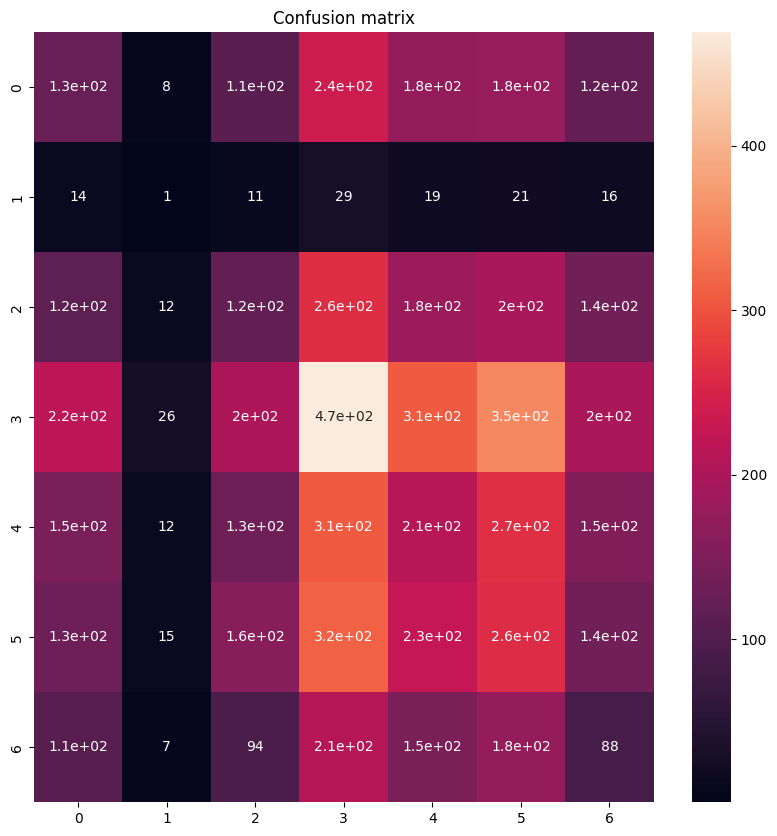

In [15]:
conf_mat=confusion_matrix(validation_generator.classes, y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(conf_mat, annot=True)
plt.title("Confusion matrix")
plt.show()

In [16]:
print(classification_report(validation_generator.classes, y_pred))

              precision    recall  f1-score   support

           0       0.15      0.13      0.14       958
           1       0.01      0.01      0.01       111
           2       0.14      0.12      0.13      1024
           3       0.26      0.26      0.26      1774
           4       0.17      0.17      0.17      1233
           5       0.18      0.21      0.19      1247
           6       0.10      0.11      0.10       831

    accuracy                           0.18      7178
   macro avg       0.14      0.14      0.14      7178
weighted avg       0.18      0.18      0.18      7178



57/57 [==============================] - 22s 391ms/step


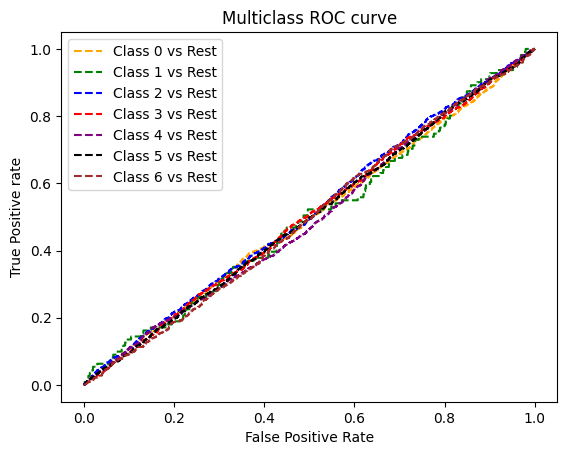

In [17]:
fpr = {}
tpr = {}
thresh ={}

n_class = 7
pred_prob=emotion_model.predict(validation_generator)
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(validation_generator.classes, pred_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='black', label='Class 5 vs Rest')
plt.plot(fpr[6], tpr[6], linestyle='--',color='brown', label='Class 6 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);


In [18]:
emotion_model.save_weights(r'C:\Users\Asus\OneDrive\Desktop\Emotion_detection_with_CNN-main\emotion_model.h5')